In [2]:
import os
os.chdir("C:\\Users\\Venki\\Desktop\\data science\\All data")

In [24]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [4]:
wine=pd.read_csv('wine.csv')

In [6]:
wine.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


# Data Analysis and EDA

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
wine1=wine.drop(['Type'],axis=1)
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
WINE1=wine1.values

In [12]:
WINE1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [13]:
wine1_normal = scale(WINE1)
wine1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

# With Data Visualisation

In [14]:
pca = PCA()
pca_values = pca.fit_transform(wine1_normal)

In [15]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [16]:
pca = PCA(n_components = 7)
pca_values = pca.fit_transform(wine1_normal)

In [17]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679])

In [18]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34])

In [19]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

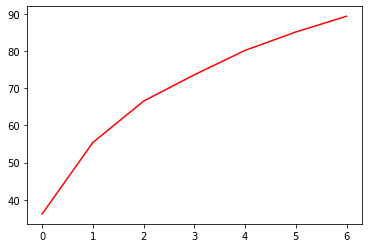

In [20]:
plt.plot(var1,color="red")

In [21]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

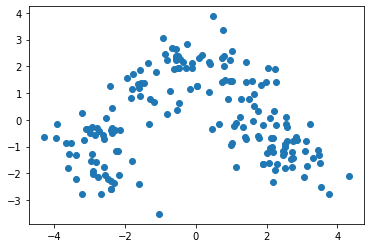

In [22]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [23]:
wineDF=pd.DataFrame(pca_values[:,:],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
wineDF

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


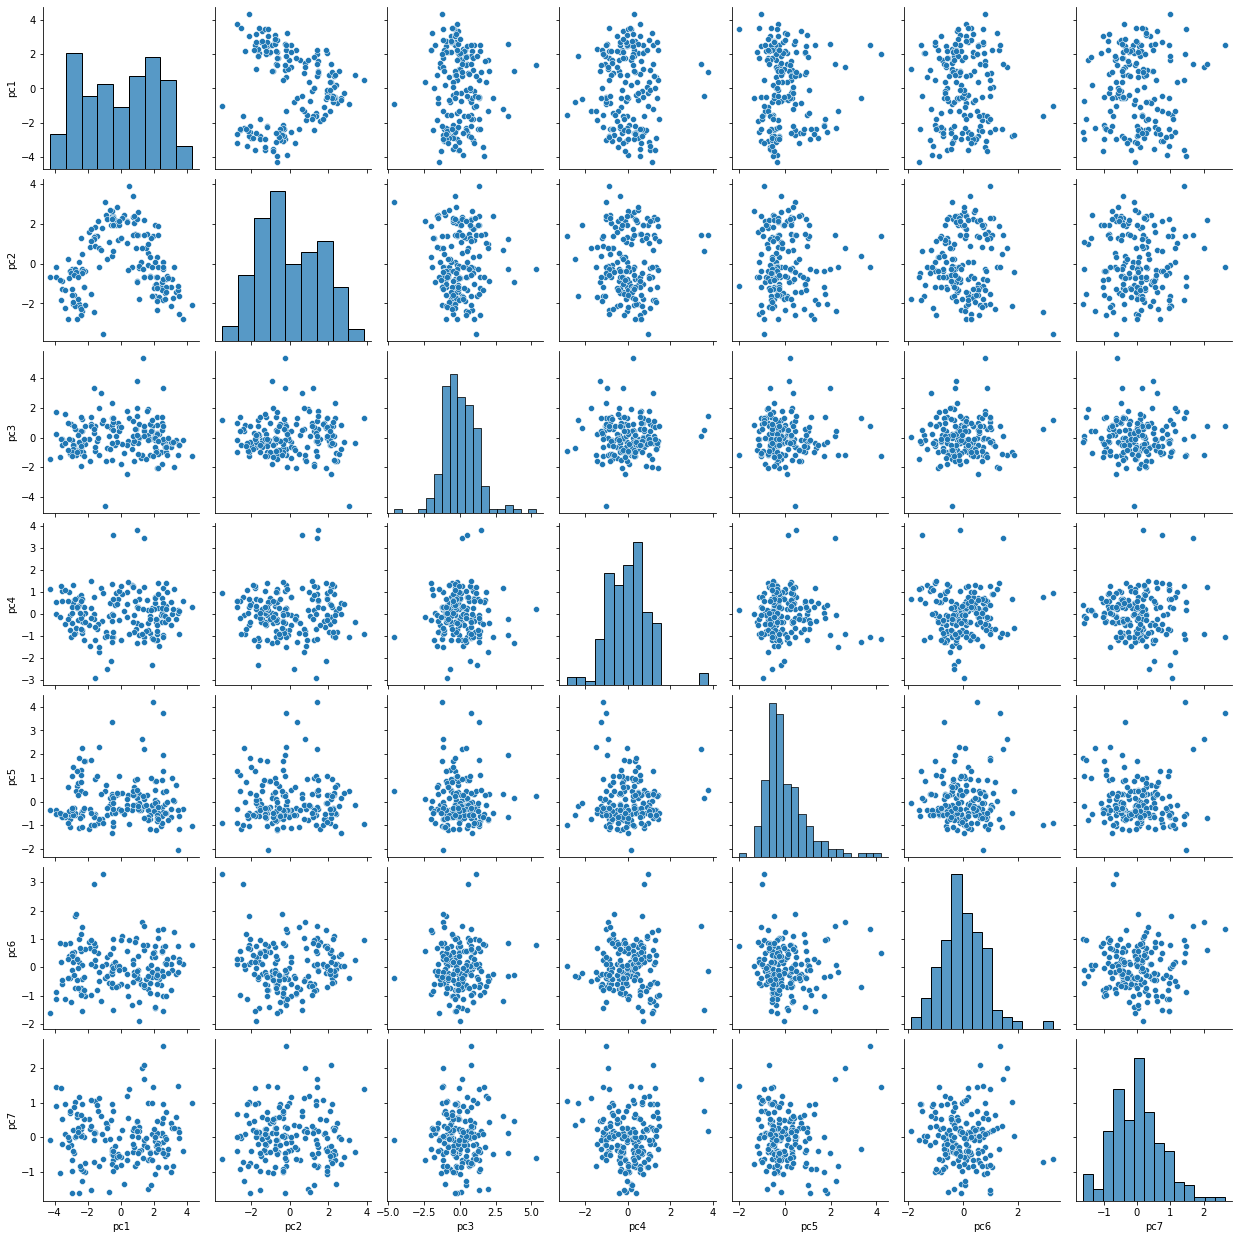

In [25]:
sns.pairplot(wineDF)

# Clustering Process with above created PCs

# Heirarchical Clustering

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [28]:
wineH=wineDF.copy()
wineH

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


In [29]:
wineH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     178 non-null    float64
 1   pc2     178 non-null    float64
 2   pc3     178 non-null    float64
 3   pc4     178 non-null    float64
 4   pc5     178 non-null    float64
 5   pc6     178 non-null    float64
 6   pc7     178 non-null    float64
dtypes: float64(7)
memory usage: 9.9 KB


In [30]:
wineH.describe()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.671572e-16,-2.270344e-16,-2.245395e-17,-1.995907e-17,-6.299580e-17,-1.403372e-17,4.180878e-18
std,2.175417e+00,1.584639e+00,1.205920e+00,9.613355e-01,9.263092e-01,8.032946e-01,7.444068e-01
min,-4.280639e+00,-3.515090e+00,-4.585064e+00,-2.890120e+00,-2.023127e+00,-1.913868e+00,-1.627192e+00
25%,-2.172762e+00,-1.233675e+00,-8.311875e-01,-6.860538e-01,-5.734337e-01,-5.508706e-01,-4.702604e-01
50%,6.051146e-02,-2.620302e-01,-1.416121e-01,-2.579312e-02,-2.658996e-01,-6.826509e-02,6.680581e-03
75%,2.001293e+00,1.398300e+00,7.600610e-01,5.871144e-01,3.550493e-01,5.434456e-01,4.239493e-01
max,4.312784e+00,3.871784e+00,5.345388e+00,3.790335e+00,4.186657e+00,3.284281e+00,2.644070e+00


<AxesSubplot:xlabel='pc1', ylabel='Density'>

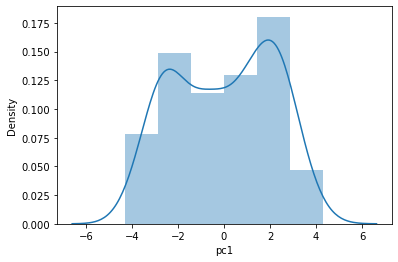

In [31]:
sns.distplot(wineH.pc1)

<AxesSubplot:xlabel='pc2', ylabel='Density'>

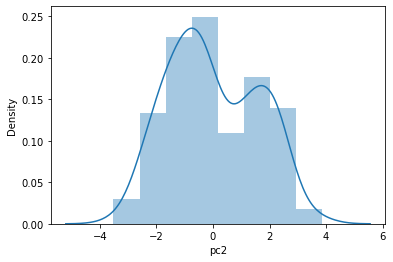

In [32]:
sns.distplot(wineH.pc2)

<AxesSubplot:xlabel='pc3', ylabel='Density'>

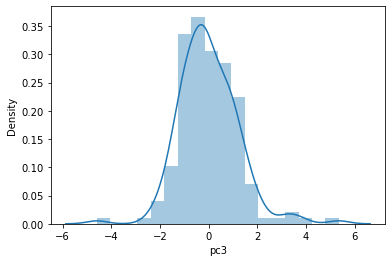

In [33]:
sns.distplot(wineH.pc3)

<AxesSubplot:xlabel='pc4', ylabel='Density'>

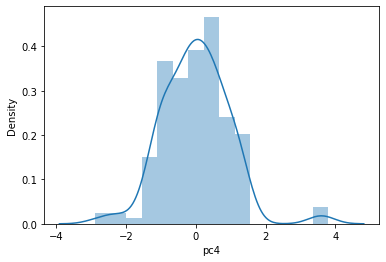

In [34]:
sns.distplot(wineH.pc4)

<AxesSubplot:xlabel='pc5', ylabel='Density'>

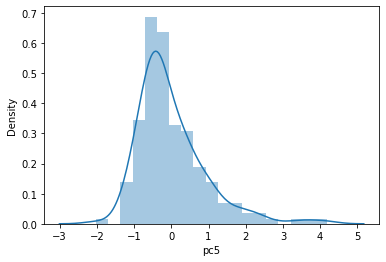

In [35]:
sns.distplot(wineH.pc5)

<AxesSubplot:xlabel='pc6', ylabel='Density'>

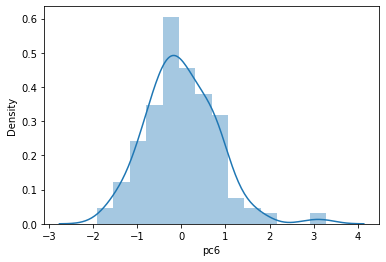

In [36]:
sns.distplot(wineH.pc6)

<AxesSubplot:xlabel='pc7', ylabel='Density'>

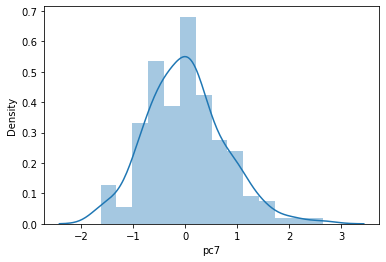

In [37]:
sns.distplot(wineH.pc7)

# Clustering with first three principal components(PCs) Heirarchical Clustering

In [38]:
WINEHc=pd.DataFrame(wineH[['pc1','pc2','pc3']])
WINEHc

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [39]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [40]:
df_norm = minmax_func(WINEHc.iloc[:,:])

In [41]:
df_norm

,pc1,pc2,pc3
0,0.884094,0.280447,0.445028
1,0.755241,0.520989,0.257653
2,0.790998,0.336264,0.560688
3,0.935332,0.102712,0.443975
4,0.615534,0.358103,0.665806
...,...,...,...
173,0.105908,0.175825,0.427221
174,0.195345,0.237971,0.482621
175,0.186515,0.102099,0.366964
176,0.220357,0.164852,0.406262


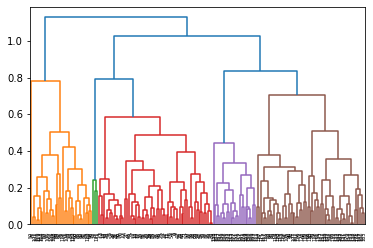

In [42]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [43]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [44]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [45]:
WINEHc['h_clusterid'] = y_hc
WINEHc

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [46]:
WINEHc[WINEHc['h_clusterid']==0]

,pc1,pc2,pc3,h_clusterid
60,-1.542480,1.381444,-0.874683,0
61,-1.836250,0.829984,-1.605702,0
64,-0.609681,1.908059,0.679358,0
68,-0.812805,0.220514,-0.707005,0
70,-1.572216,0.884983,-0.628998,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [48]:
WINEHc[WINEHc['h_clusterid']==1]

,pc1,pc2,pc3,h_clusterid
59,-0.928582,3.073486,-4.585064,1
62,0.030607,1.262786,-1.784408,1
63,2.050262,1.925033,-0.007369,1
66,2.248507,1.884592,-2.031840,1
67,0.183384,2.427146,-1.069746,1
69,1.975620,1.403283,-1.238276,1
71,1.657682,0.956712,1.952584,1
74,1.832568,1.287878,0.458280,1
75,-0.867993,2.444101,-1.563333,1
76,0.370014,2.153907,-2.449386,1


In [49]:
WINEHc[WINEHc['h_clusterid']==2]

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
65,0.900228,0.763911,0.573361,2
73,2.562227,-0.260199,3.374394,2
78,1.262931,0.770850,-1.184225,2
95,2.543865,-0.169274,0.788697,2


In [51]:
WINEHcMean=WINEHc.groupby('h_clusterid').mean()
WINEHcMean

,pc1,pc2,pc3
h_clusterid,,,
0,-2.050921,-0.138209,0.145108
1,0.692043,2.043865,-0.340533
2,2.238862,-0.878947,-0.008064


In [52]:
WINEHc

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [53]:
WINEHc['h_clusterid']=WINEHc['h_clusterid'].replace(0, '1')
WINEHc['h_clusterid']=WINEHc['h_clusterid'].replace(1, '2')
WINEHc['h_clusterid']=WINEHc['h_clusterid'].replace(2, '3')
WINEHc

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,3
1,2.209465,0.333393,-2.026457,3
2,2.516740,-1.031151,0.982819,3
3,3.757066,-2.756372,-0.176192,3
4,1.008908,-0.869831,2.026688,3
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


# K-Means Clustering to WINEH dataset

In [54]:
wineH

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


In [55]:
WINEK=pd.DataFrame(wineH[['pc1','pc2','pc3']])
WINEK

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [56]:
def minmax_func(i):
    X = (i-i.min())/(i.max()-i.min())
    return (X)

In [57]:
def norm_func(i):
    X = (i-i.mean())/(i.std())
    return (X)

In [58]:
X=norm_func(WINEK.iloc[:,:])
X

,pc1,pc2,pc3
0,1.524651,-0.910909,-0.137438
1,1.015651,0.210390,-1.680425
2,1.156900,-0.650717,0.814995
3,1.727056,-1.739432,-0.146106
4,0.463777,-0.548914,1.680616
...,...,...,...
173,-1.549370,-1.398608,-0.284073
174,-1.196072,-1.108915,0.172135
175,-1.230955,-1.742289,-0.780269
176,-1.097269,-1.449760,-0.456661


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_WINEK_df = scaler.fit_transform(WINEK.iloc[:,:])

In [60]:
scaled_WINEK_df

array([[ 1.52895179e+00, -9.13478982e-01, -1.37825595e-01],
       [ 1.01851648e+00,  2.10983913e-01, -1.68516534e+00],
       [ 1.16016384e+00, -6.52552421e-01,  8.17294251e-01],
       [ 1.73192758e+00, -1.74433875e+00, -1.46517953e-01],
       [ 4.65085422e-01, -5.50462585e-01,  1.68535731e+00],
       [ 1.40610238e+00, -1.34313751e+00, -5.23394199e-01],
       [ 1.12897840e+00, -7.43490601e-01, -8.12534459e-01],
       [ 9.49356728e-01, -1.01821406e+00,  1.21645371e-01],
       [ 1.15745981e+00, -5.80990809e-01, -1.47270585e+00],
       [ 1.26936420e+00, -4.99586692e-01, -8.18482431e-01],
       [ 1.60408482e+00, -8.24166841e-01, -3.51538969e-01],
       [ 8.08903878e-01, -3.87282859e-01, -9.90312897e-01],
       [ 9.74261323e-01, -4.27613105e-01, -7.19390243e-01],
       [ 1.59413696e+00, -7.15506314e-01, -1.00145446e+00],
       [ 1.98810193e+00, -1.32641441e+00, -1.05104701e+00],
       [ 1.06264288e+00, -1.05212704e+00,  1.81203879e-01],
       [ 1.00122533e+00, -1.47280883e+00

[531.0]
[531.0, 380.37034196202904]
[531.0, 380.37034196202904, 250.85163265595187]
[531.0, 380.37034196202904, 250.85163265595187, 184.4862405386972]
[531.0, 380.37034196202904, 250.85163265595187, 184.4862405386972, 156.21996765447727]
[531.0, 380.37034196202904, 250.85163265595187, 184.4862405386972, 156.21996765447727, 135.09921535865632]
[531.0, 380.37034196202904, 250.85163265595187, 184.4862405386972, 156.21996765447727, 135.09921535865632, 119.26796388165133]
[531.0, 380.37034196202904, 250.85163265595187, 184.4862405386972, 156.21996765447727, 135.09921535865632, 119.26796388165133, 109.00236966370831]
[531.0, 380.37034196202904, 250.85163265595187, 184.4862405386972, 156.21996765447727, 135.09921535865632, 119.26796388165133, 109.00236966370831, 96.99822686923227]
[531.0, 380.37034196202904, 250.85163265595187, 184.4862405386972, 156.21996765447727, 135.09921535865632, 119.26796388165133, 109.00236966370831, 96.99822686923227, 90.47560845263537]


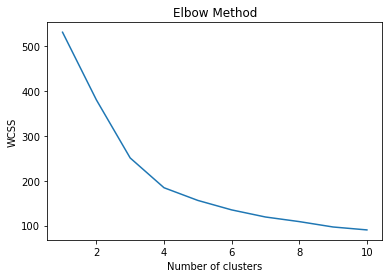

In [62]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(X)

KMeans(n_clusters=3, random_state=0)

In [64]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [65]:
WINEK['clusterid_new'] = clusters_new.labels_
WINEK

,pc1,pc2,pc3,clusterid_new
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [66]:
clusters_new.cluster_centers_

array([[-1.23349172, -0.69401512, -0.20572812],
       [ 1.04578129, -0.57775611, -0.0860657 ],
       [-0.0108886 ,  1.12358852,  0.25053024]])

In [68]:
WINEKmean=WINEK.groupby('clusterid_new').agg(['mean']).reset_index()
WINEKmean

,clusterid_new,pc1,pc2,pc3
,,mean,mean,mean
0,0,-2.683358,-1.099763,-0.248092
1,1,2.275010,-0.915535,-0.103788
2,2,-0.023687,1.780482,0.302119


In [69]:
WINEK['clusterid_new'].value_counts()

2    64
1    62
0    52
Name: clusterid_new, dtype: int64

In [70]:
WINEK['clusterid_new']=WINEK['clusterid_new'].replace(0, '1')
WINEK['clusterid_new']=WINEK['clusterid_new'].replace(1, '2')
WINEK['clusterid_new']=WINEK['clusterid_new'].replace(2, '3')
WINEK

,pc1,pc2,pc3,clusterid_new
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


# Comparing Clusters obtained with original data wine

In [71]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [72]:
WINEHc.h_clusterid.value_counts()

1    81
3    64
2    33
Name: h_clusterid, dtype: int64

In [73]:
WINEK.clusterid_new.value_counts()

3    64
2    62
1    52
Name: clusterid_new, dtype: int64

we can conclude that we created three clusters from Principal components Dataset of original data And we can say that the clusters obtained from PC data by Hierarchical Clustering method is almost same as compared to clusters(Type column) of gievn origianl dataset(wine).